In [1]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

In [2]:

%pprint
%run ../../load_magic/storage.py
%run ../../load_magic/paths.py
%run ../../load_magic/lists.py
%run ../../load_magic/environment.py
%run ../../load_magic/dataframes.py

from bs4 import BeautifulSoup as bs
import networkx as nx
import re
import urllib.request

notebook_path = get_notebook_path()
print(notebook_path)
s = Storage()
#pandemic_df = s.load_object('pandemic_df')
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])

dir()

Pretty printing has been turned OFF
D:\Documents\Repositories\notebooks\Miscellaneous\ipynb\Nuclear Arsenals.ipynb
['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']


['Config', 'In', 'Out', 'RandomForestClassifier', 'SequenceMatcher', 'Storage', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '__warningregistry__', '_dh', '_i', '_i1', '_i2', '_ih', '_ii', '_iii', '_oh', 'bs', 'check_4_doubles', 'check_for_typos', 'conjunctify_nouns', 'copyfile', 'csv', 'encoding', 'example_iterrows', 'exit', 'filepath_regex', 'get_classifier', 'get_column_descriptions', 'get_data_structs_dataframe', 'get_datastructure_prediction', 'get_dir_tree', 'get_git_lfs_track_commands', 'get_importances', 'get_input_sample', 'get_ipython', 'get_max_rsquared_adj', 'get_module_version', 'get_notebook_path', 'get_page_tables', 'get_specific_gitignore_files', 'get_struct_name', 'humanize_bytes', 'io', 'ipykernel', 'json', 'jupyter_config_dir', 'math', 'notebook_path', 'notebookapp', 'nx', 'os', 'pd', 'pickle', 'plt', 'preprocess_data', 'print_all_files_ending_starting_with', 'print_all_files_ending_wi


---
# Scrape the Data

In [3]:

tables_url = 'https://en.wikipedia.org/wiki/List_of_states_with_nuclear_weapons'
tables_list = get_page_tables(tables_url)

[(4, (44, 2)), (2, (12, 7)), (9, (26, 2)), (10, (19, 2)), (3, (7, 4)), (5, (14, 2)), (12, (7, 2)), (1, (10, 1)), (11, (4, 2)), (17, (4, 2)), (18, (4, 2)), (0, (5, 1)), (6, (2, 2)), (7, (2, 2)), (8, (2, 2)), (14, (2, 2)), (16, (2, 2)), (13, (1, 2)), (15, (1, 2))]


In [32]:

nuclear_weapons_df = tables_list[2].copy()
nuclear_weapons_df.columns = ['country_name', 'warheads_total', 'date_of_first_test', 'test_site_of_first_test', 'ctbt_status',
                              'delivery_methods', 'number_of_tests']
#nuclear_weapons_df.country_name.to_dict()
idx_list = list(range(1, 6)) + list(range(7, 10)) + [11]
mask_series = nuclear_weapons_df.index.isin(idx_list)
nuclear_weapons_df = nuclear_weapons_df[mask_series]
nuclear_weapons_df['is_npt'] = False
nuclear_weapons_df.loc[slice(1, 6), 'is_npt'] = True
nuclear_weapons_df['is_declared'] = True
nuclear_weapons_df.loc[11, 'is_declared'] = False
cleaning_func = lambda x: int(re.sub(r'\D+', '', x.split('/')[1].split('[')[0].split('–')[0].split('-')[0]))
nuclear_weapons_df.warheads_total = nuclear_weapons_df.warheads_total.map(cleaning_func)
nuclear_weapons_df.set_index('country_name', drop=True, inplace=True)
columns_list = ['warheads_total', 'is_npt', 'is_declared']
nuclear_weapons_df.sort_values('warheads_total', ascending=False)[columns_list]

,warheads_total,is_npt,is_declared
country_name,,,
Russia,6500,True,True
United States,6185,True,True
France,300,True,True
China,290,True,True
United Kingdom,215,True,True
Pakistan,150,False,True
India,130,False,True
Israel,80,False,False
North Korea,20,False,True


In [36]:

print(['ax.{}'.format(fn) for fn in dir(ax) if 'lim' in fn.lower()])

['ax._set_lim_and_transforms', 'ax._stale_viewlim_x', 'ax._stale_viewlim_y', 'ax._unstale_viewLim', 'ax._update_image_limits', 'ax._update_line_limits', 'ax._update_patch_limits', 'ax._validate_converted_limits', 'ax._viewLim', 'ax.dataLim', 'ax.get_xlim', 'ax.get_ylim', 'ax.ignore_existing_data_limits', 'ax.relim', 'ax.set_xlim', 'ax.set_ylim', 'ax.transLimits', 'ax.update_datalim', 'ax.update_datalim_bounds', 'ax.viewLim']


In [69]:

nuclear_weapons_df.loc['Dave Babbitt', 'warheads_total'] = 1
nuclear_weapons_df.warheads_total = nuclear_weapons_df.warheads_total.map(lambda x: int(x))

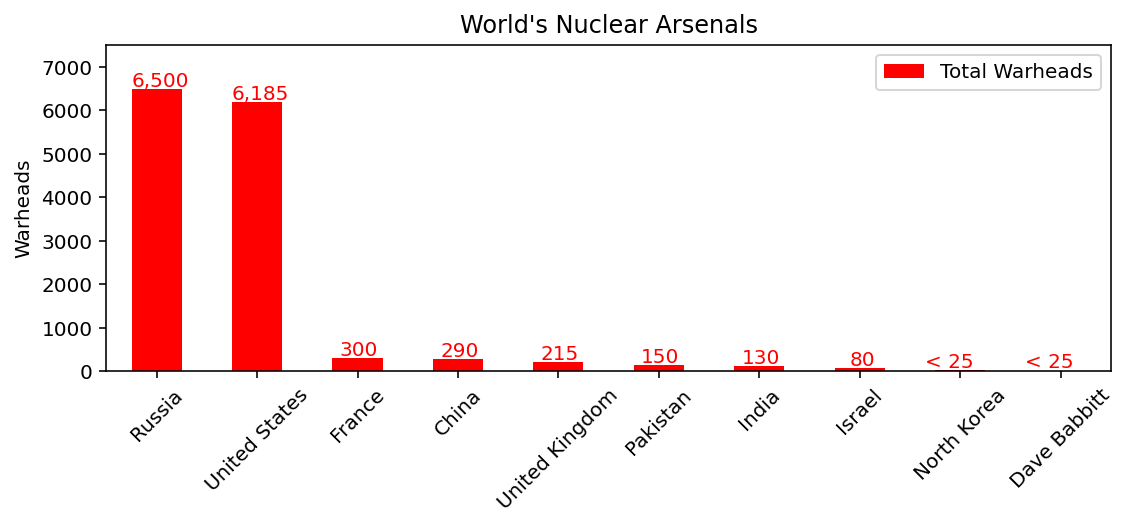

In [77]:

%config InlineBackend.figure_format = 'retina'
fig, ax = plt.subplots(figsize=(9, 3))
AxesSubplot_obj = nuclear_weapons_df.sort_values('warheads_total',
                                                 ascending=False).plot.bar(color='r', rot=45, ax=ax,
                                                                           title="World's Nuclear Arsenals")
Legend_obj = ax.legend(title=None, labels=['Total Warheads'])
ax.set_xlabel('')
ax.set_ylabel('Warheads')
ylim_tuple = (0, 7500)
ax.set_ylim(ylim_tuple)
for i, v in enumerate(nuclear_weapons_df.sort_values('warheads_total', ascending=False).warheads_total):
    if v < 25:
        v = '< 25'
        ax.text(i + 0.05 - .1*4, 25 + 50, v, color='red')
    else:
        ax.text(i + 0.05 - .075*len(str(v)), v + 50, '{:,}'.format(v), color='red')